# Библиотеки

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    r2_score,
    confusion_matrix,
    classification_report,
)
# Models:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Глобальные переменные

In [2]:
SEED = 42

# Подготовка данных

In [3]:
dataset = load_digits()
print(dataset.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
data = pd.concat([
    pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
    pd.DataFrame(dataset['target'], columns=['target'])
], axis=1)

display(data)

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [5]:
def plot_number(row, target_col='target'):
    picture = row.drop(target_col).to_numpy().reshape(8, 8)
    plt.figure(figsize=(3, 3))
    plt.imshow(picture, cmap='gray_r', interpolation='nearest')
    plt.title(f"Цифра: {int(row[target_col])}")
    plt.axis('off')
    plt.show()

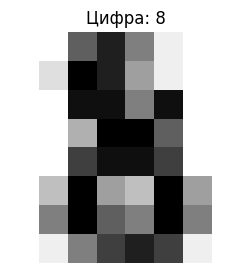

In [6]:
plot_number(data.iloc[-1])

In [7]:
train, test = train_test_split(
    data,
    test_size=0.25,
    random_state=SEED,
    stratify=data['target']
)

In [8]:
TARGET = 'target'
FEATURES = data.drop(TARGET, axis=1).columns.to_list()

In [9]:
X_train, y_train, X_test, y_test = (
    train[FEATURES], train[TARGET], test[FEATURES], test[TARGET]
)

# Обучение моделей

In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Kernel SVM": SVC(probability=True, decision_function_shape='ovr'),
    "Decision Tree": DecisionTreeClassifier(max_depth=8),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "k-NN": KNeighborsClassifier(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "Naive Bayes (Multinomial)": MultinomialNB(),
    "MLP": MLPClassifier(),
    "LDA": LinearDiscriminantAnalysis(),
}

In [11]:
pbar = tqdm(models.items())
for (model_name, model) in pbar:
    pbar.set_description(model_name)
    models[model_name] = model.fit(X_train, y_train)

LDA: 100%|██████████| 10/10 [00:32<00:00,  3.23s/it]                     


# Оценка моделей

In [12]:
def calc_metrics(y_true, y_pred, y_proba, model_name):
    return pd.Series({
        'accuracy': accuracy_score(y_true, y_pred),
        'precision_macro': precision_score(y_true, y_pred, average='macro'),
        'recall_macro': recall_score(y_true, y_pred, average='macro'),
        'f1_macro': f1_score(y_true, y_pred, average='macro'),
        'r2': r2_score(y_true, y_pred),
        'roc_auc_ovo': roc_auc_score(y_true, y_proba, multi_class='ovo', average='macro'),
        'roc_auc_ovr': roc_auc_score(y_true, y_proba, multi_class='ovr', average='macro'),
    }, name=model_name)

In [13]:
def metrics_by_models(models, X, y):
    history = []
    for (model_name, model) in tqdm(models.items()):
        history.append(calc_metrics(
            y, model.predict(X),
            model.predict_proba(X), model_name
        ))
    history = pd.DataFrame(history)
    sorted_index = history.mean(axis=1).sort_values(ascending=False).index
    return history.loc[sorted_index, :]

In [14]:
test_stats  = metrics_by_models(models, X_test, y_test) * 100
train_stats = metrics_by_models(models, X_train, y_train) * 100

100%|██████████| 10/10 [00:04<00:00,  2.35it/s]


Метрики на тестовой выборке:

In [15]:
display(test_stats)

,accuracy,precision_macro,recall_macro,f1_macro,r2,roc_auc_ovo,roc_auc_ovr
Kernel SVM,99.111111,99.143720,99.095270,99.107136,96.807636,99.959187,99.959341
k-NN,98.444444,98.458512,98.407932,98.410549,95.509047,99.494150,99.495062
MLP,96.888889,96.896582,96.831030,96.807599,92.154359,99.900401,99.900581
Random Forest,96.444444,96.488110,96.386586,96.374506,90.368799,99.894953,99.895470
Logistic Regression,96.000000,96.005615,95.941922,95.947789,89.773613,99.880851,99.881729
Gradient Boosting,95.777778,95.909107,95.755993,95.766761,84.985066,99.864752,99.865498
LDA,95.333333,95.364018,95.305369,95.317913,83.415938,99.773504,99.774966
Naive Bayes (Multinomial),88.222222,88.607855,88.255273,88.221925,69.699593,98.910126,98.912813
Naive Bayes (Gaussian),82.888889,85.546270,82.836520,83.052817,47.677690,96.300399,96.301563
Decision Tree,80.888889,81.082173,80.859954,80.844432,50.599515,91.595853,91.601292


Метрики на обучающей выборке:

In [16]:
display(train_stats)

,accuracy,precision_macro,recall_macro,f1_macro,r2,roc_auc_ovo,roc_auc_ovr
Logistic Regression,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Random Forest,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
MLP,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Gradient Boosting,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
Kernel SVM,99.851522,99.854544,99.851852,99.852379,99.529357,99.999207,99.999206
k-NN,99.257610,99.263371,99.260786,99.257726,97.474818,99.997141,99.997128
LDA,96.733482,96.795921,96.738874,96.747626,91.474116,99.916922,99.916970
Decision Tree,94.357832,94.481298,94.362045,94.386574,85.192839,99.574192,99.574326
Naive Bayes (Multinomial),90.720119,91.280222,90.750018,90.782547,73.399605,99.245813,99.246144
Naive Bayes (Gaussian),84.706756,89.602185,84.722850,84.843648,58.085598,98.864317,98.864050


Разница метрик между `train` и `test` для контроля переобучения:

In [17]:
delta_stats = (train_stats - test_stats)
delta_stats = delta_stats.loc[delta_stats.mean(axis=1).index, :]
display(delta_stats)

,accuracy,precision_macro,recall_macro,f1_macro,r2,roc_auc_ovo,roc_auc_ovr
Decision Tree,13.468943,13.399125,13.502091,13.542142,34.593324,7.978338,7.973034
Gradient Boosting,4.222222,4.090893,4.244007,4.233239,15.014934,0.135248,0.134502
Kernel SVM,0.740411,0.710824,0.756582,0.745243,2.721721,0.040020,0.039864
LDA,1.400148,1.431902,1.433505,1.429713,8.058178,0.143417,0.142004
Logistic Regression,4.000000,3.994385,4.058078,4.052211,10.226387,0.119149,0.118271
MLP,3.111111,3.103418,3.168970,3.192401,7.845641,0.099599,0.099419
Naive Bayes (Gaussian),1.817867,4.055915,1.886330,1.790831,10.407908,2.563918,2.562487
Naive Bayes (Multinomial),2.497897,2.672367,2.494745,2.560622,3.700012,0.335687,0.333330
Random Forest,3.555556,3.511890,3.613414,3.625494,9.631201,0.105047,0.104530
k-NN,0.813165,0.804859,0.852855,0.847177,1.965771,0.502991,0.502066
